In [1]:
from photometry_tools import Image, Atlas
from astropy.io import fits
from astropy.coordinates import SkyCoord
%load_ext autoreload
%autoreload 2

Could not import regions, which is required for some of the functionalities of this module.


In [2]:
# read information
direct_coord = SkyCoord('02h42m40.7091669408s -00d00m47.859690204s')
ra, dec = direct_coord.ra, direct_coord.dec 
hdul_list = []
hdul = fits.open('/Users/luoyilin/Astro/NGC1068/NGC1068_images/NGC1068_GALEX_FUV.fits')
hdul_list.append(hdul)
hdul = fits.open('/Users/luoyilin/Astro/NGC1068/NGC1068_images/NGC1068_2MASS_Ks.fits')
hdul_list.append(hdul)
hdul = fits.open('/Users/luoyilin/Astro/NGC1068/NGC1068_images/NGC1068_SDSS_r.fits')
hdul_list.append(hdul)
hdul = fits.open('/Users/luoyilin/Astro/NGC1068/NGC1068_images/NGC1068_WISE_4.6.fits')
hdul_list.append(hdul)
header_list = [i[0].header for i in hdul_list]
data_list = [i[0].data for i in hdul_list]

In [3]:
# build up the image_list
image_list = []
for i in range(len(hdul_list)):
    img = Image(data=data_list[i], header=header_list[i], target_coordinate=(ra.value, dec.value))
    
    # roughly estimate the background properties.
    img.background_properties()
    
    # build up the target galaxy mask.
    img.mask_galaxy()
    
    # build up the stars mask.
    img.mask_stars()
    
    # build up the mask for estimating the backgroud.
    img.mask_background()

    # get the background model.
    img.background_model()
    
    # background subtraction.
    img.background_subtract()

    # detect the point foreground stars.
    img.get_sources_foreground()

    # clean all the foreground stars.
    img.remove_sources_simple()
    
    # get the error function.
    img.get_error()
    
    image_list.append(img)

In [4]:
# build up Atlas.
atlas = Atlas(image_list=image_list)
# match images.
atlas.match_images()
# cicular measurement.
atlas.circular_measurement(radius=300, a_v=0.1033)

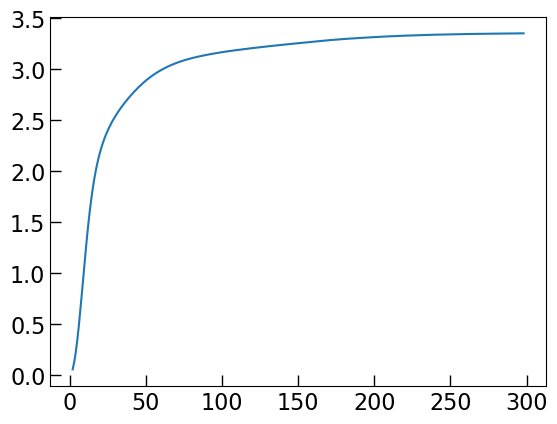

In [7]:
# try to show the WISE_4.6 band (just easily read from the dictionary 'atlas._circular_measurement').
# Flux and error grow with the measurement aperture expanding.
from matplotlib import pyplot as plt
flux1 = atlas._circular_measurement[4.6]['flux']
error1  = atlas._circular_measurement[4.6]['error']
x = [i for i in range(2, 299)]
f = [flux1(xx) for xx in x]
e = [error1(xx) for xx in x]
plt.plot(x, f)

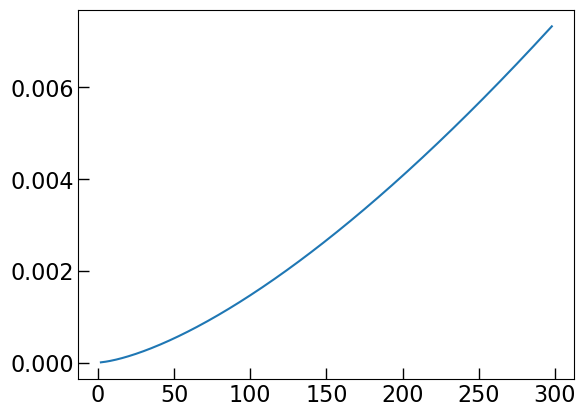

In [8]:
plt.plot(x, e)